<a href="https://colab.research.google.com/github/branndonm1/branndonm1/blob/main/blacksholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def get_current_stock_price(symbol):
    try:
        stock = yf.Ticker(symbol)
        current_price = stock.info['ask']
        return current_price
    except Exception as e:
        print(f"Error: {e}")
        return None

# Apple's stock symbol is AAPL
apple_stock_price = get_current_stock_price('AAPL')

if apple_stock_price is not None:
    print(f"Apple's current stock price: ${apple_stock_price}")

Apple's current stock price: $191.87


In [ ]:
def get_historical_stock_data(symbol, start_date, end_date):
    try:
        stock = yf.Ticker(symbol)
        data = stock.history(start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

def calculate_volatility(stock_data):
    if stock_data is not None and not stock_data.empty:
        returns = stock_data['Close'].pct_change().dropna()
        volatility = np.std(returns)
        annualized_volatility = volatility * np.sqrt(252)  # Assuming 252 trading days in a year
        return annualized_volatility
    else:
        return None

# Replace 'AAPL' with the stock symbol of Apple or any other stock you are interested in
stock_symbol = 'AAPL'
start_date = '2023-01-01'  # Replace with the desired start date
end_date = '2024-01-01'    # Replace with the desired end date

historical_data = get_historical_stock_data(stock_symbol, start_date, end_date)
volatility = calculate_volatility(historical_data)

if volatility is not None:
    print(f"Approximate annualized volatility of {stock_symbol} stock: {volatility:.2%}")
else:
    print("Failed to retrieve historical stock data.")

Approximate annualized volatility of AAPL stock: 19.91%


<ipython-input-16-40ac9bf0ba47>:2: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(current_price / strike_price) + (interest_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))


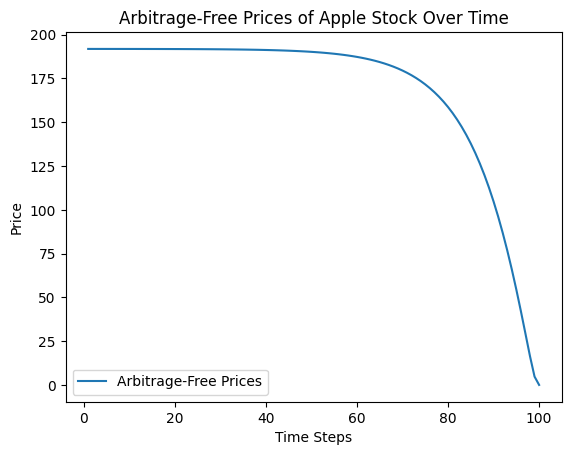

191.87
[191.85745654457105, 191.856137359054, 191.8546794379185, 191.8530681910994, 191.85128749426275, 191.84931952748303, 191.84714459696116, 191.8447409380019, 191.8420844972815, 191.8391486922296, 191.83590414512156, 191.8323183892246, 191.82835554406327, 191.82397595656025, 191.81913580447116, 191.8137866581537, 191.80787499629815, 191.80134167078808, 191.79412131535392, 191.78614169212292, 191.77732296955332, 191.76757692455786, 191.75680606087204, 191.7449026348897, 191.73174757927558, 191.71720931365064, 191.70114243053274, 191.68338624348308, 191.6637631830517, 191.64207702461823, 191.61811093057372, 191.59162528746822, 191.56235531674477, 191.53000843547, 191.49426134103723, 191.4547567911404, 191.41110004736527, 191.36285494750243, 191.30953956811777, 191.25062143499636, 191.1855122347702, 191.11356197631315, 191.0340525453066, 190.94619058969744, 190.84909966755646, 190.74181158204667, 190.6232568207884, 190.49225400881562, 190.34749827550232, 190.18754842626606, 190.010812

In [ ]:
def black_scholes(current_price, strike_price, time_to_maturity, volatility, interest_rate):
    d1 = (np.log(current_price / strike_price) + (interest_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)
    call_price = current_price * norm.cdf(d1) - strike_price * np.exp(-interest_rate * time_to_maturity) * norm.cdf(d2)
    return call_price

def calculate_arbitrage_free_prices(current_price, time_steps, volatility, interest_rate):
    prices = []
    time_points = np.arange(1, time_steps + 1)

    for t in time_points:
        time_to_maturity = time_steps-t
        arbitrage_free_price = black_scholes(current_price, 250, time_to_maturity, volatility, interest_rate)
        prices.append(arbitrage_free_price)

    return time_points, prices

def plot_prices(time_points, prices):
    plt.plot(time_points, prices, label='Arbitrage-Free Prices')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.title('Arbitrage-Free Prices of Apple Stock Over Time')
    plt.legend()
    plt.show()

# Parameters
current_price = apple_stock_price  # Replace with the current price of Apple stock
time_steps = 100
volatility = volatility  # Replace with the desired volatility
interest_rate = .10  # Replace with the desired interest rate

# Calculate prices and plot
time_points, prices = calculate_arbitrage_free_prices(current_price, time_steps, volatility, interest_rate)
plot_prices(time_points, prices)

print(apple_stock_price)
print(prices)